In [21]:
import pyautogui
import time
from IPython.display import display
from PIL import Image
import cv2
from datetime import datetime
import numpy as np
from scipy import fftpack

# from PIL import Image as Im
# Módulo para a utilização da tecnologia OCR
import pytesseract
# Extraindo o texto da imagem
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

def pegarValor(regiao):
    capturar = pyautogui.screenshot(region=regiao)
    capturar.save('fotoTeste.jpg',grayscale=True)
    imagem = cv2.imread('fotoTeste.jpg')
    #display(Image.open('fotoTeste.jpg'))
    valor=pytesseract.image_to_string(image=imagem )
    return valor


def retornarValores(linha):
    data_hora=""
    
    fimDataHora=False
    for letra in linha:
        if(letra==','):
            fimDataHora=True
            linha=linha.replace(data_hora+",","")
        else: 
            if(fimDataHora!=True):
                data_hora+=letra
            
    fimVela=False
    vela=""
    for letra in linha:
        if(letra==','):
            fimVela=True
            linha=linha.replace(vela+",","")
        else:
            if(fimVela!=True):
                vela=vela+letra
            
    NJogadores=""
    fimNJogadores=False
    for letra in linha:
        if(letra==','):
            fimNJogadores=True
            linha=linha.replace(NJogadores+",","")
        else: 
            if(fimNJogadores!=True):
                NJogadores=NJogadores+letra
            
    valorTotalApostado=""
    fimValorTotalApostado=False
    
    for letra in linha:
        if(letra==','):
            fimValorTotalApostado=True
            linha=linha.replace(valorTotalApostado+",","")
        else: 
            if(fimValorTotalApostado!=True):
                valorTotalApostado=valorTotalApostado+letra
        
    return data_hora,vela,NJogadores,valorTotalApostado
def valorValido(valor):
     
    data_horaValida=False
    velaValida=False
    NJogadoresValido=False
    valorTotalApostadoValido=False
    
    data_hora,vela,NJogadores,valorTotalApostado=retornarValores(valor)
    if ((data_hora.count(':')==2)and(data_hora.count('-')==2 )and(len(data_hora)==19)):
        data_horaValida=True
    if(vela.count('.')==1 and(len(vela)>=4)):
        velaValida=True
    if(NJogadores.count('.')==0 and len(NJogadores)>1):
        NJogadoresValido=True
    if(valorTotalApostado.count('.')==1 and len(valorTotalApostado)>=4):
        valorTotalApostadoValido=True
    
    valorValido=(data_horaValida and velaValida and NJogadoresValido and valorTotalApostadoValido)
    
#     if(valorValido):
#         print("data_hora: "+data_hora+" vela: "+vela+" NJogadores: "+ NJogadores+ " valorTotalApostado: "+valorTotalApostado)
#     else:
#         print("data_hora: "+data_hora+" vela: "+vela+" NJogadores: "+ NJogadores+ " valorTotalApostado: "+valorTotalApostado+" valor Invalido")
    
    
    return valorValido


def tratarArquivo(nomeDoArquivo):
    
    

    arquivo = open(nomeDoArquivo,'r')
    
   
    padrao="0123456789:.,-\n\t "



 
    conteudoTratado=arquivo.read()
    for k in conteudoTratado:
        if(k not in padrao):
            conteudoTratado=conteudoTratado.replace(k,"")
    
    palavra=""
    conteudoTratado2=""
    cont=0
    
    for caracter in conteudoTratado:
        if (caracter!='\n'):
            palavra=palavra+caracter
            
        else:
            cont=cont+1
            #print("Palavra "+str(cont)+": "+palavra)
            
            if(valorValido(palavra)):
                conteudoTratado2=conteudoTratado2+palavra+"\n"
 
            palavra=""
    return(conteudoTratado2)
    
import matplotlib.pyplot as plt

def vetores(conteudo):
    
    data_horaV=[]
    velaV=[]
    NJogadoresV=[]
    valorTotalApostadoV=[]
    palavra=""
    for caracter in conteudo:
        if (caracter!='\n'):
            palavra=palavra+caracter

        else:
            #print("Palavra "+str(cont)+": "+palavra)
            data_hora,vela,NJogadores,valorTotalApostado=retornarValores(palavra)
            data_horaV.append(data_hora)
            velaV.append(float(vela))
            NJogadoresV.append(float(NJogadores))
            valorTotalApostadoV.append(float(valorTotalApostado))
            palavra=""

    return data_horaV,velaV,NJogadoresV,valorTotalApostadoV

def desligarPc():
    pyautogui.press('win')
    time.sleep(1)
    pyautogui.write('cmd')
    time.sleep(1)
    pyautogui.press('enter')
    time.sleep(1)
    pyautogui.write('shutdown -s -t 60')
    pyautogui.press('enter')

In [8]:
desligarPcQuandoTerminar=True # coloque false caso nao queira desligar no final
tempoInicial=time.time()
print("tempoInicial: ", tempoInicial)
tempoMinimo=1#Em segundos
arquivo = open("arquivos\palavrasNaoTratadas\palavras16.txt",'a')
while((time.time()-tempoInicial)<tempoMinimo):
    vela=pegarValor(regiao=(731,308, 170,170));
    vela=vela.replace("\n", "")
    vela=vela.replace(" ","")

    jogadores=pegarValor(regiao=(149, 795, 300, 50));
    jogadores=jogadores.replace("\n","")
    jogadores=jogadores.replace(" ","")
    jogadores=jogadores.replace("jogadores","")
    jogadores=jogadores.replace("fizeram","")
    jogadores=jogadores.replace("suas","")
    jogadores=jogadores.replace("apostas","")
    
    totalApostado=pegarValor(regiao=(1082, 796, 300, 50));
    totalApostado=totalApostado.replace("\n","")
    totalApostado=totalApostado.replace(" ","")
    if("CRASHED" in vela):
        vela=vela.replace("x","")
        vela=vela.replace("X","")
        vela=vela.replace("CRASHED","")
        arquivo.write(datetime.now().strftime('%Y-%m-%d %H:%M:%S')+","+vela+","+jogadores+","+totalApostado+"\n")
        time.sleep(7)
print("Tempo de execução: ",(time.time()-tempoInicial))

if(desligarPcQuandoTerminar):
    desligarPc()

tempoInicial:  1656703704.4605708
Tempo de execução:  1.8549325466156006


In [3]:
conteudoTratado=tratarArquivo("arquivos\palavrasNaoTratadas\palavras1.txt")
conteudoTratado=conteudoTratado+ tratarArquivo("arquivos\palavrasNaoTratadas\palavras2.txt")
conteudoTratado=conteudoTratado+ tratarArquivo("arquivos\palavrasNaoTratadas\palavras3.txt")
conteudoTratado=conteudoTratado+ tratarArquivo("arquivos\palavrasNaoTratadas\palavras4.txt")
conteudoTratado=conteudoTratado+ tratarArquivo("arquivos\palavrasNaoTratadas\palavras5.txt")
conteudoTratado=conteudoTratado+ tratarArquivo("arquivos\palavrasNaoTratadas\palavras6.txt")
conteudoTratado=conteudoTratado+ tratarArquivo("arquivos\palavrasNaoTratadas\palavras7.txt")
conteudoTratado=conteudoTratado+ tratarArquivo("arquivos\palavrasNaoTratadas\palavras8.txt")
conteudoTratado=conteudoTratado+ tratarArquivo("arquivos\palavrasNaoTratadas\palavras9.txt")
conteudoTratado=conteudoTratado+ tratarArquivo("arquivos\palavrasNaoTratadas\palavras10.txt")
conteudoTratado=conteudoTratado+ tratarArquivo("arquivos\palavrasNaoTratadas\palavras11.txt")
conteudoTratado=conteudoTratado+ tratarArquivo("arquivos\palavrasNaoTratadas\palavras12.txt")
conteudoTratado=conteudoTratado+ tratarArquivo("arquivos\palavrasNaoTratadas\palavras13.txt")
conteudoTratado=conteudoTratado+ tratarArquivo("arquivos\palavrasNaoTratadas\palavras14.txt")
conteudoTratado=conteudoTratado+ tratarArquivo("arquivos\palavrasNaoTratadas\palavras15.txt")
conteudoTratado=conteudoTratado+ tratarArquivo("arquivos\palavrasNaoTratadas\palavras16.txt")
arquivo = open("arquivos\palavrasNaoTratadas\palavras17.txt",'a')
arquivo = open("arquivos\CreateTableVelas.txt",'w')

arquivo.write("vela={\nDataHora,ValorCrash,NumeroJogadores,ValorTotalApostado\n"+conteudoTratado+"\n}");
print(conteudoTratado)

2022-06-28 17:01:51,1.22,2524,15062.00
2022-06-28 17:02:57,31.33,2029,14462.00
2022-06-28 17:03:17,1.69,3588,8393.45
2022-06-28 17:03:38,2.03,3253,14342.00
2022-06-28 17:03:48,1.00,2950,14242.00
2022-06-28 17:04:07,1.74,3291,13302.00
2022-06-28 17:04:18,1.00,3430,13993.88
2022-06-28 17:05:04,1.22,3681,13714.00
2022-06-28 17:05:22,1.61,2938,16171.00
2022-06-28 17:05:55,4.09,2947,18014.00
2022-06-28 17:06:10,1.35,3206,15914.00
2022-06-28 17:06:23,1.22,2745,17054.00
2022-06-28 17:07:23,19.34,3347,16136.71
2022-06-28 17:07:50,2.89,2985,14426.00
2022-06-28 17:09:10,1.38,2921,17953.00
2022-06-28 17:09:20,1.00,2242,15691.13
2022-06-28 17:10:12,2.40,3458,17394.00
2022-06-28 17:10:56,7.37,3120,16198.00
2022-06-28 17:11:32,4.74,2784,15269.00
2022-06-28 17:12:13,6.53,2759,14980.61
2022-06-28 17:13:09,15.54,2838,26943.00
2022-06-28 17:13:29,1.89,2923,3700.00
2022-06-28 17:13:53,2.14,2300,4202.08
2022-06-28 17:14:11,1.69,2836,7437.40
2022-06-28 17:14:23,1.11,2890,7654.00
2022-06-28 17:14:38,1.36,24

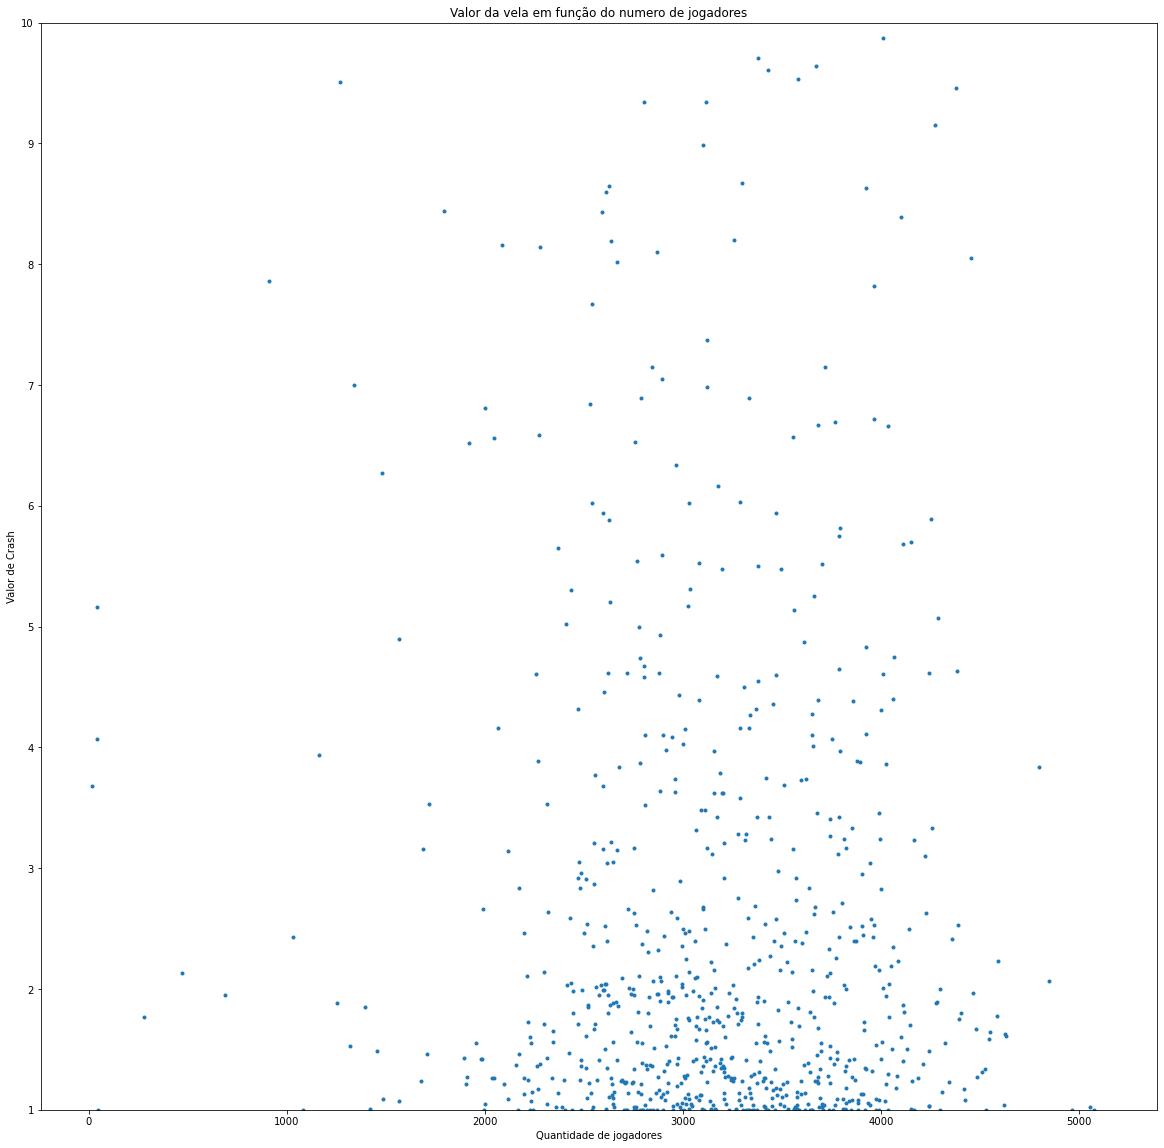

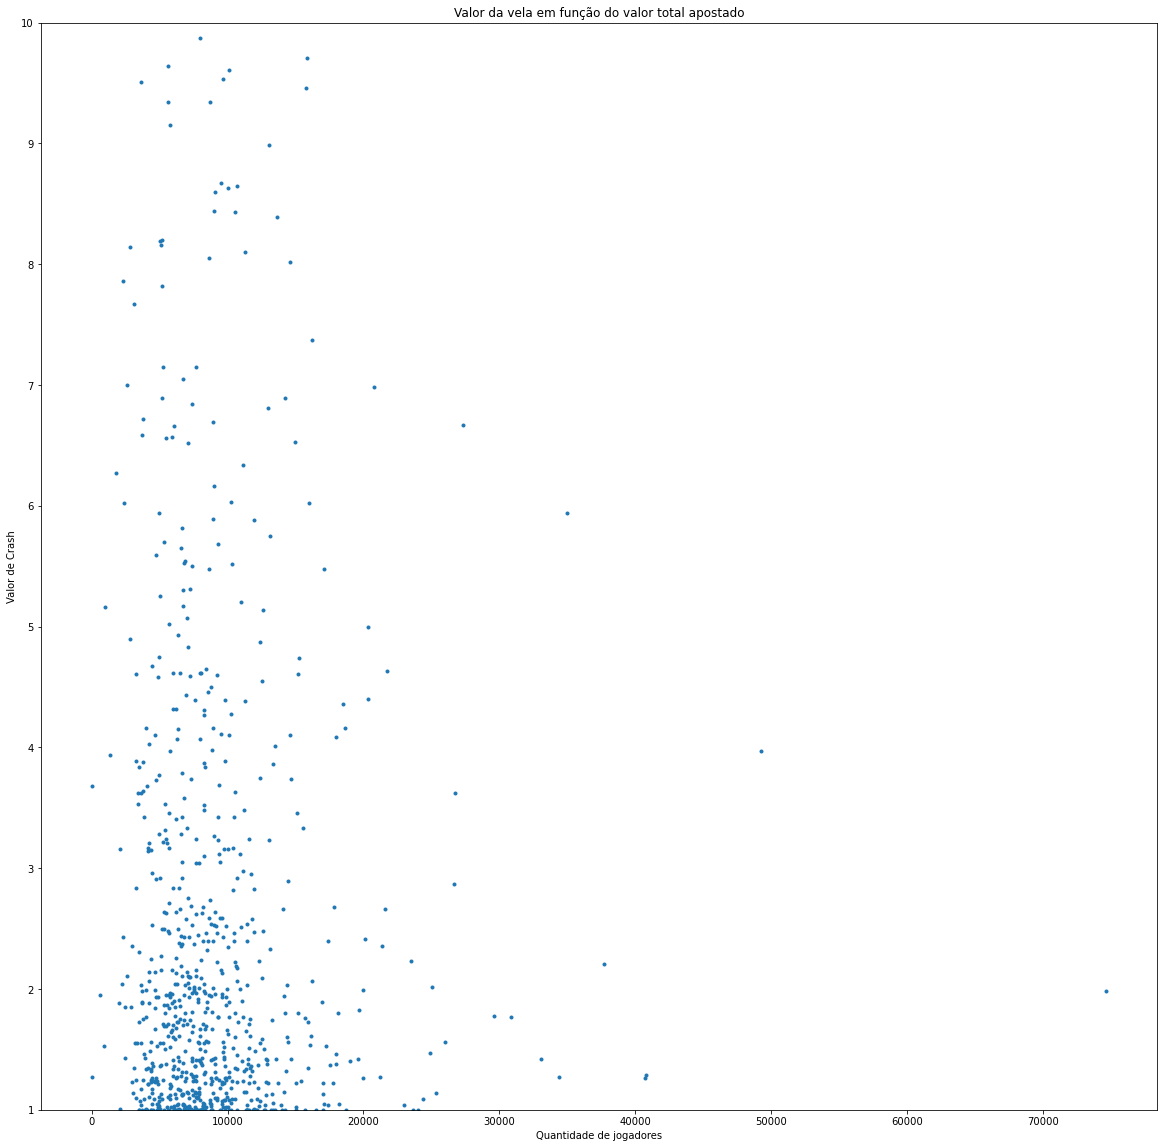

Maior valor de vela registado:  344.48
Média dos valores:  5.872937062937064
Porcentagem de velas com valor igual a 1:  7.6923076923076925
Porcentagem de velas com valor igual a 1:  7.6923076923076925


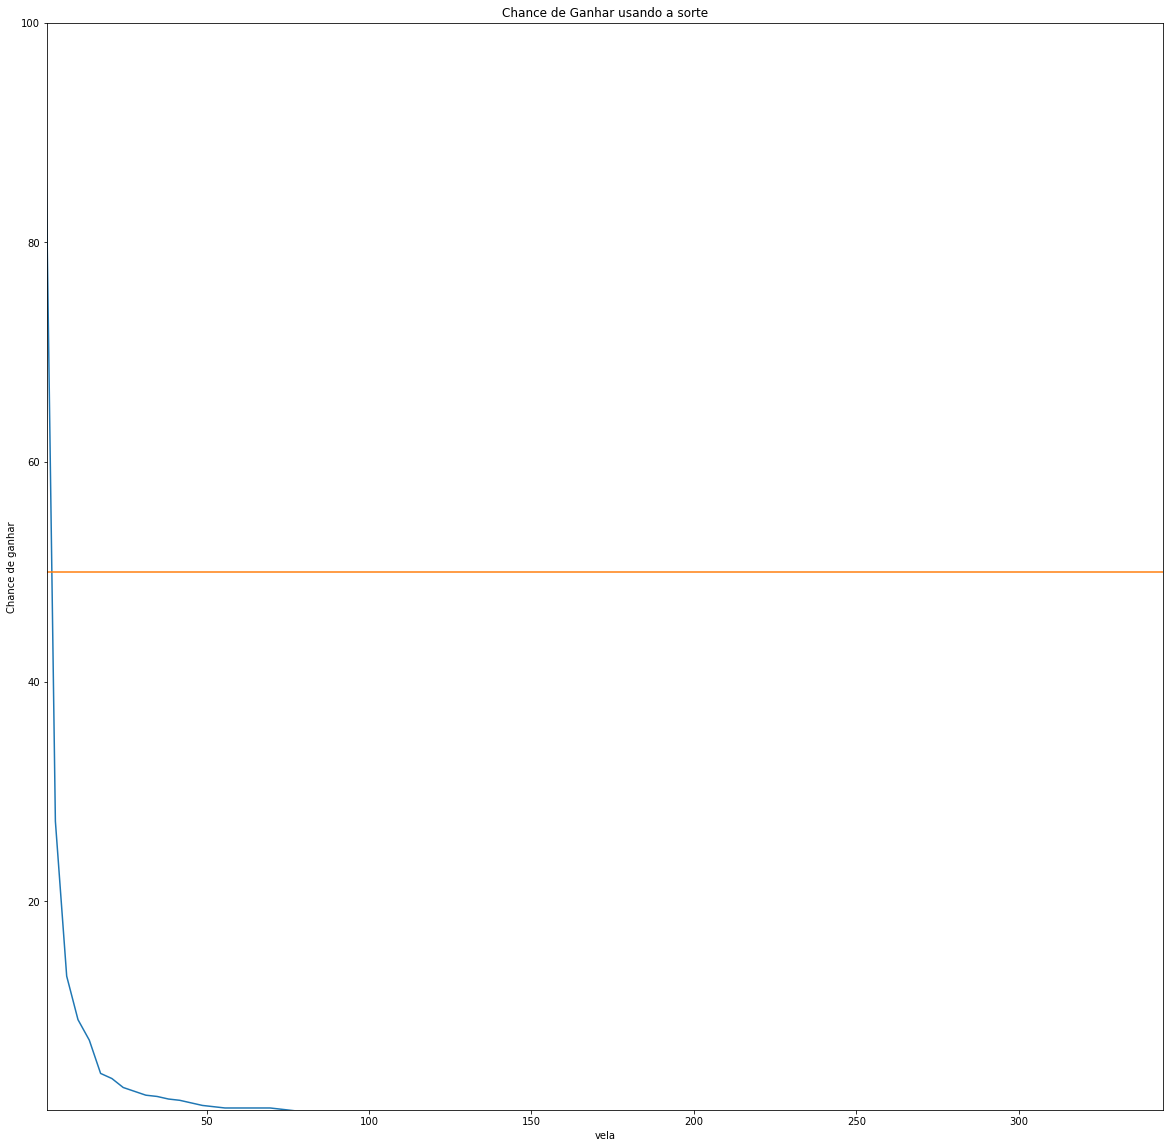

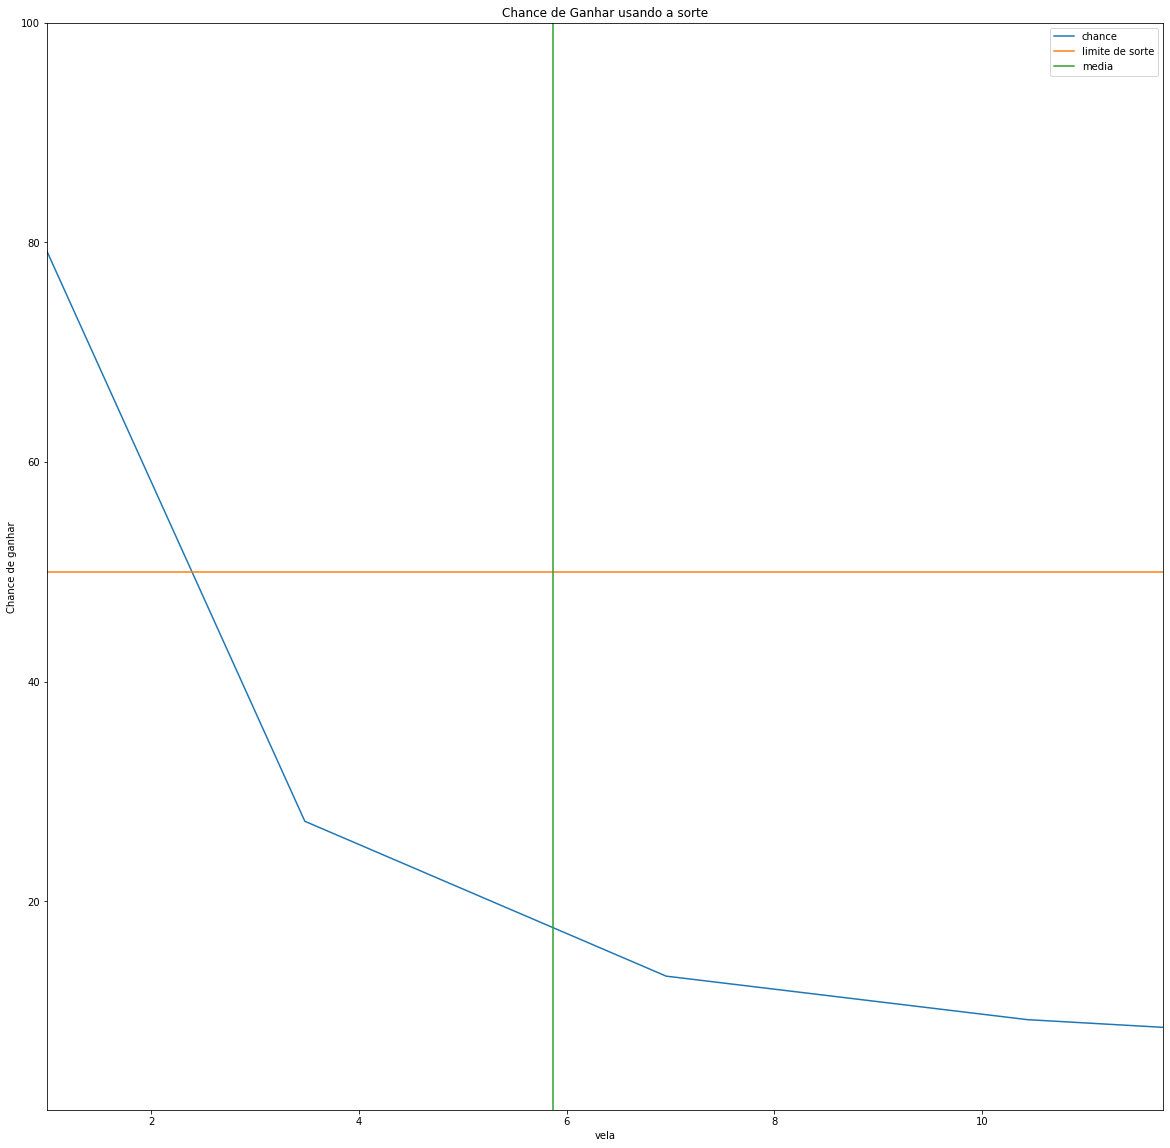

In [4]:
valorMinimo=1
valorMaximo=10
scale='linear'
if((valorMaximo-valorMinimo)>1000):
    scale='log'
    

data_hora,valorVela,NJogadores,valorTotalApostado=vetores(conteudoTratado)

plt.figure(figsize=(20, 20))
plt.xlabel("Quantidade de jogadores")
plt.ylabel("Valor de Crash")
plt.yscale(scale)
plt.plot(NJogadores,valorVela,".")

plt.title("Valor da vela em função do numero de jogadores")
plt.ylim([valorMinimo, valorMaximo])

plt.show()

plt.figure(figsize=(20, 20))
plt.xlabel("Quantidade de jogadores")
plt.ylabel("Valor de Crash")
plt.yscale(scale)
plt.plot(valorTotalApostado,valorVela,".")
plt.ylim([valorMinimo, valorMaximo])
plt.title("Valor da vela em função do valor total apostado")
plt.show()




plt.show()

maiorValor=max(valorVela)
print("Maior valor de vela registado: ", maiorValor)

media=np.mean(valorVela)
print("Média dos valores: ", media)

quantidadeDeUns=100*valorVela.count(1.00)/len(valorVela)
print("Porcentagem de velas com valor igual a 1: ", quantidadeDeUns)

quantidadeDeVelas=100*valorVela.count(1.00)/len(valorVela)
print("Porcentagem de velas com valor igual a 1: ", quantidadeDeUns)

numeros=np.linspace(0,maiorValor,100)

chance=[]
for k in numeros:
    chance.append(100*np.sum(valorVela>k)/len(valorVela))

plt.figure(figsize=(20, 20))
plt.xlabel("vela")
plt.ylabel("Chance de ganhar")
plt.plot(numeros,chance)
plt.plot(numeros,(numeros>=0)*50)
plt.title("Chance de Ganhar usando a sorte")
plt.ylim([1, 100])
plt.xlim([1, maiorValor])
plt.show()

plt.figure(figsize=(20, 20))
plt.xlabel("vela")
plt.ylabel("Chance de ganhar")
plt.plot(numeros,chance)
plt.plot(numeros,(numeros>=0)*50)
plt.plot((numeros>=0)*media,numeros)
plt.legend(["chance","limite de sorte","media"])
plt.title("Chance de Ganhar usando a sorte")
plt.ylim([1, 100])
plt.xlim([1, media*2])
plt.show()

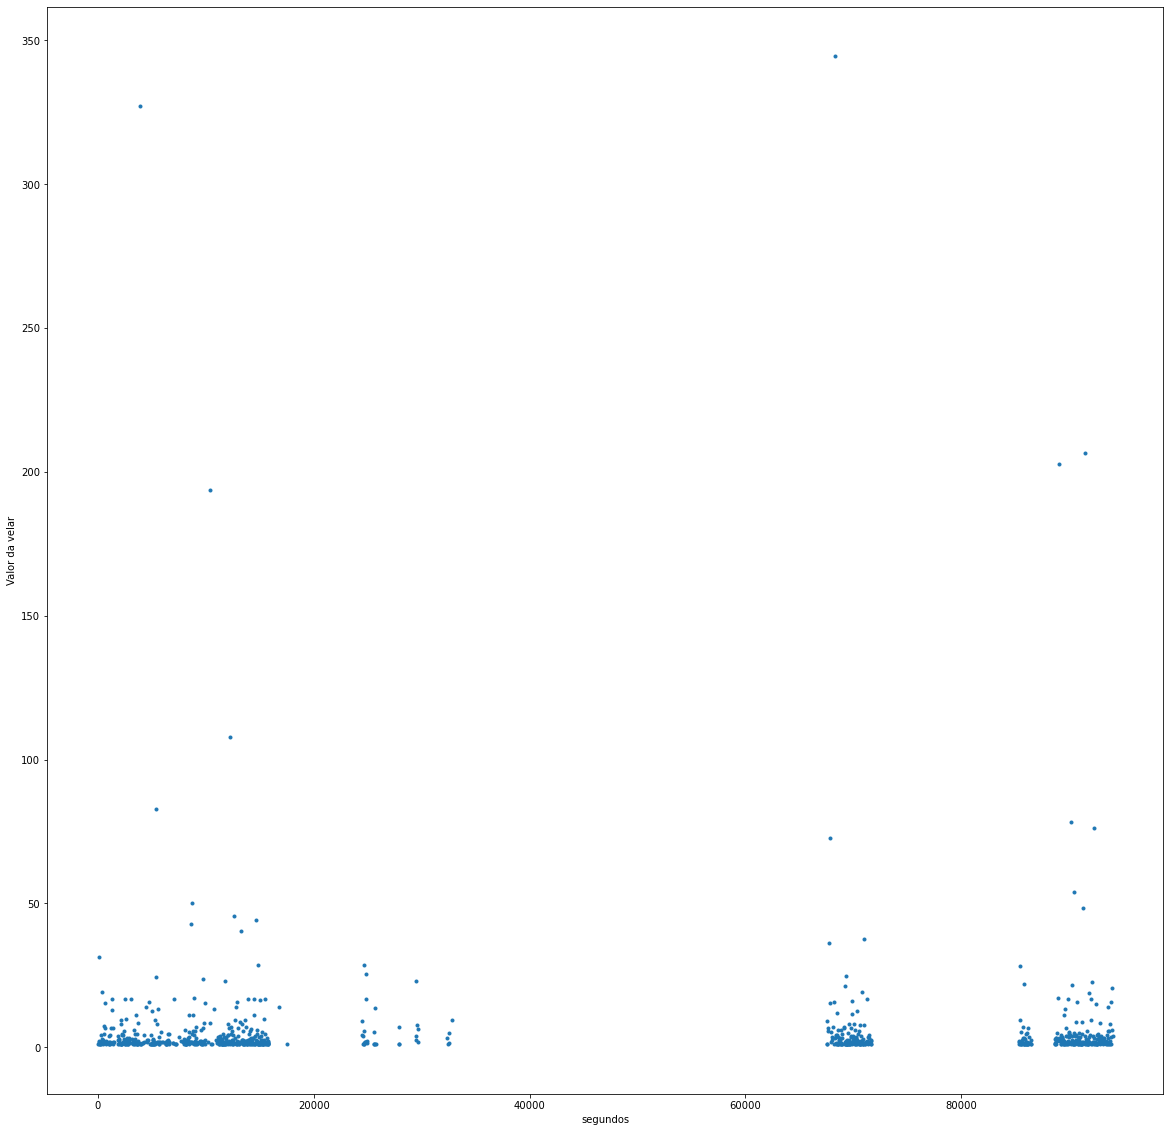

In [5]:
#Analise no domínio da frequência
def dataHoraToSec(data_hora):
    
    dataCalculo=data_hora
    
    ano=""
    mes=""
    dia=""
    hora=""
    minuto=""
    segundo=""
    
    fim=False
    for k in dataCalculo:
        if(k=='-' and fim==False ):
            fim=True
            dataCalculo=dataCalculo.replace(ano+"-","")
        else:
            if(fim==False):
                ano+=k
                
    fim=False 
    for k in dataCalculo:
        if(k=='-' and fim==False ):
            fim=True
            dataCalculo=dataCalculo.replace(mes+"-","")
        else:
            if(fim==False):
                mes+=k               
                
    fim=False 
    for k in dataCalculo:
        if(k==" " and fim==False ):
            fim=True
            dataCalculo=dataCalculo.replace(dia+" ","")
        else:
            if(fim==False):
                dia+=k      
 
    fim=False 
    for k in dataCalculo:
        if(k==":" and fim==False ):
            fim=True
            dataCalculo=dataCalculo.replace(hora+":","")
        else:
            if(fim==False):
                hora+=k   
    fim=False 
    for k in dataCalculo:
        if(k==":" and fim==False ):
            fim=True
            dataCalculo=dataCalculo.replace(minuto+":","")
        else:
            if(fim==False):
                minuto+=k
                
    for k in dataCalculo:

        segundo+=k
    
    
    tempo=float(ano)*365*24*60*60+float(mes)*30*24*60*60+float(dia)*24*60*60+float(hora)*60*60+float(minuto)*60+float(segundo)
    
    return tempo
    



tempoInicial=dataHoraToSec(data_hora[0])



tempo=[]
for data in data_hora:
    tempo.append(dataHoraToSec(data)-dataHoraToSec(data_hora[0]))

plt.figure(figsize=(20, 20))
plt.xlabel("segundos")
plt.ylabel("Valor da velar")
plt.plot(tempo,valorVela,".")
plt.show()

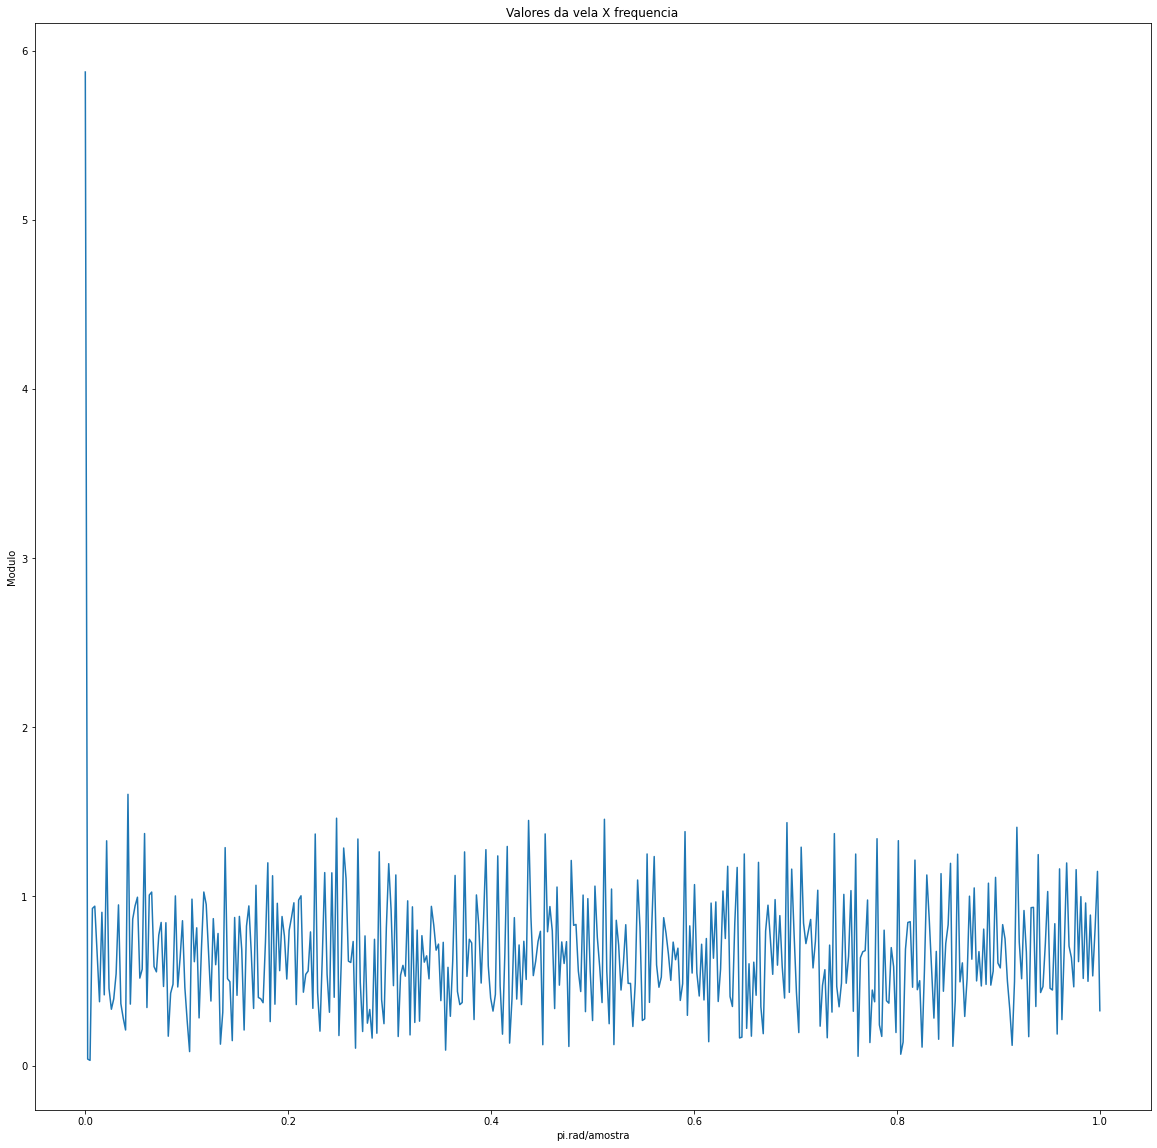

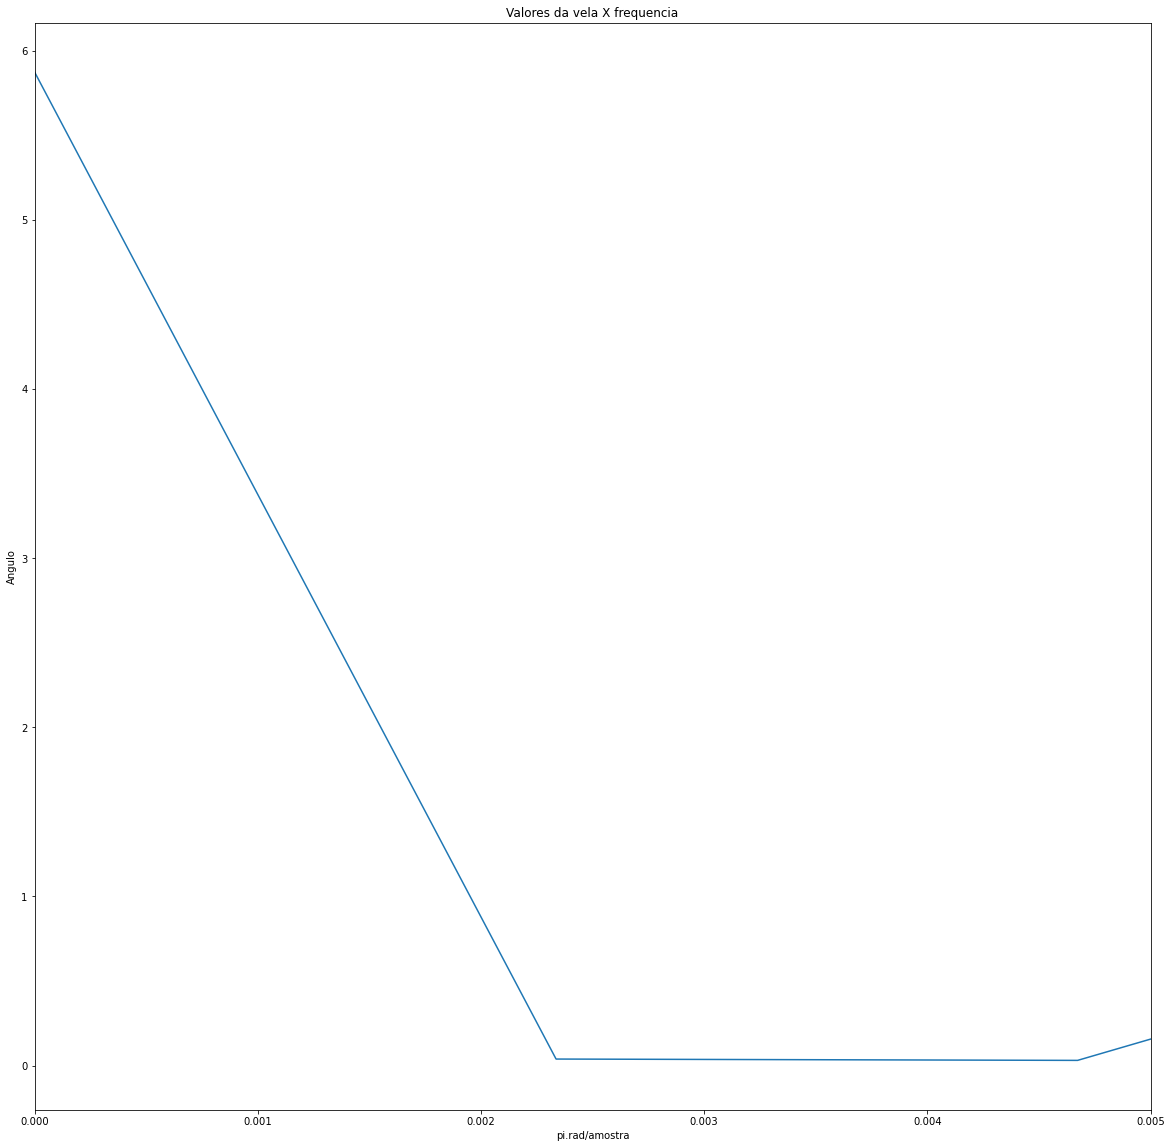

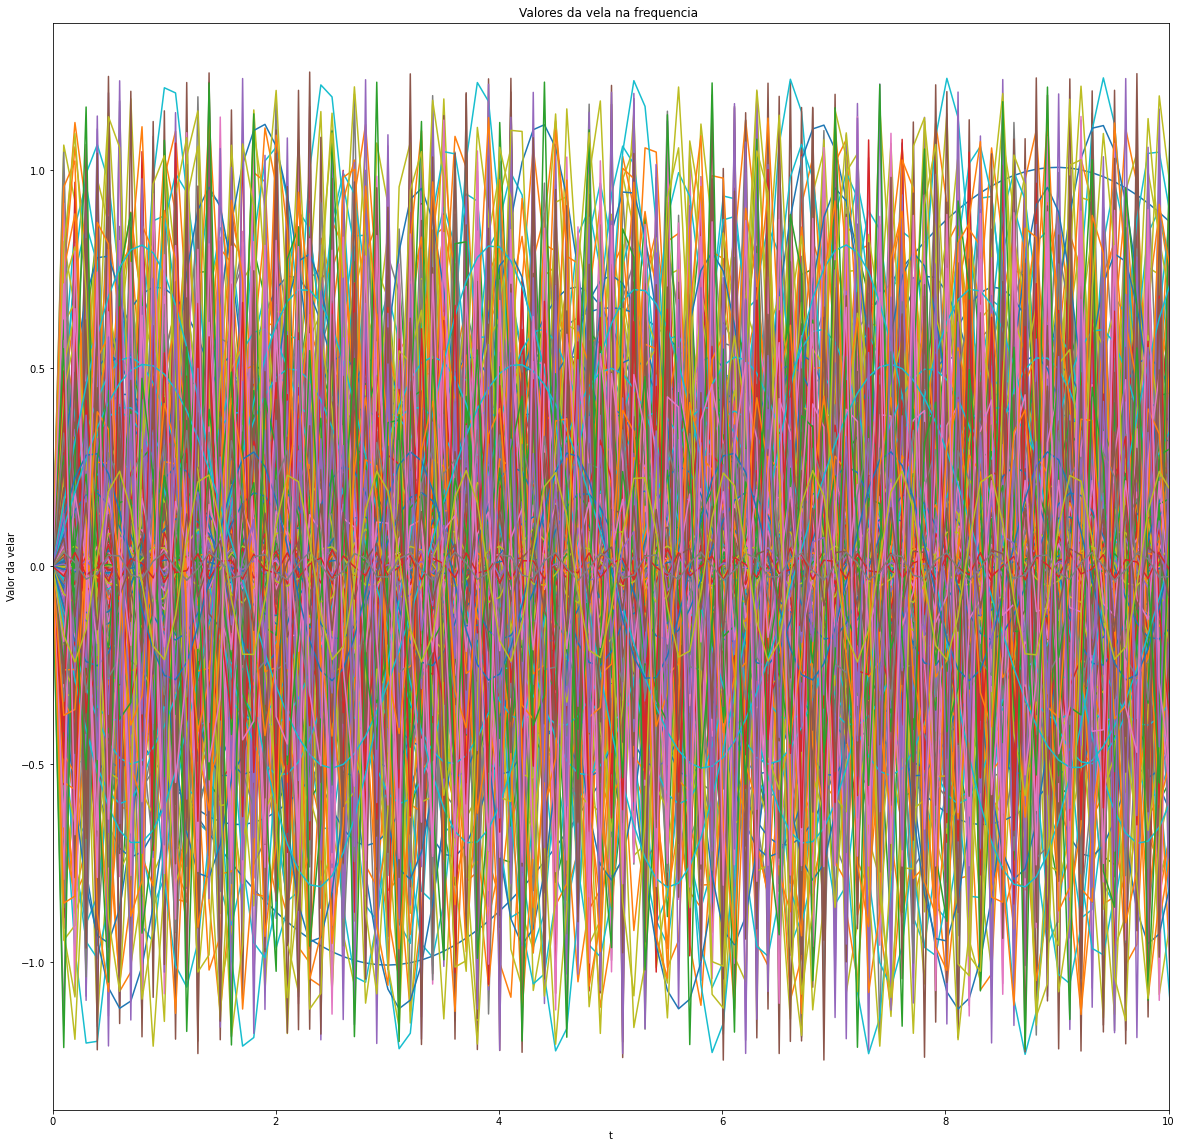

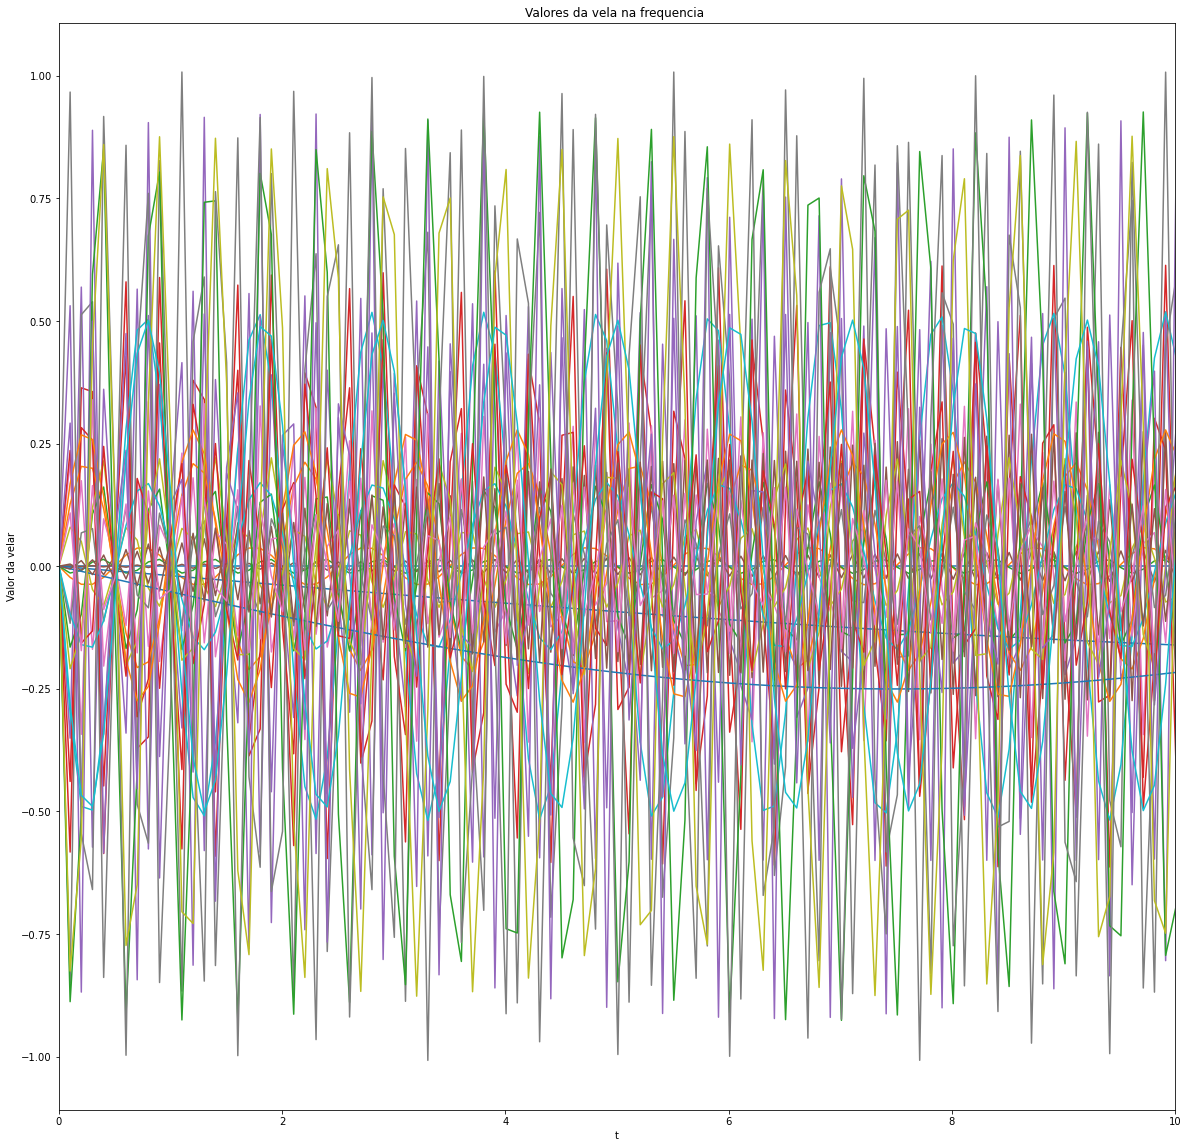

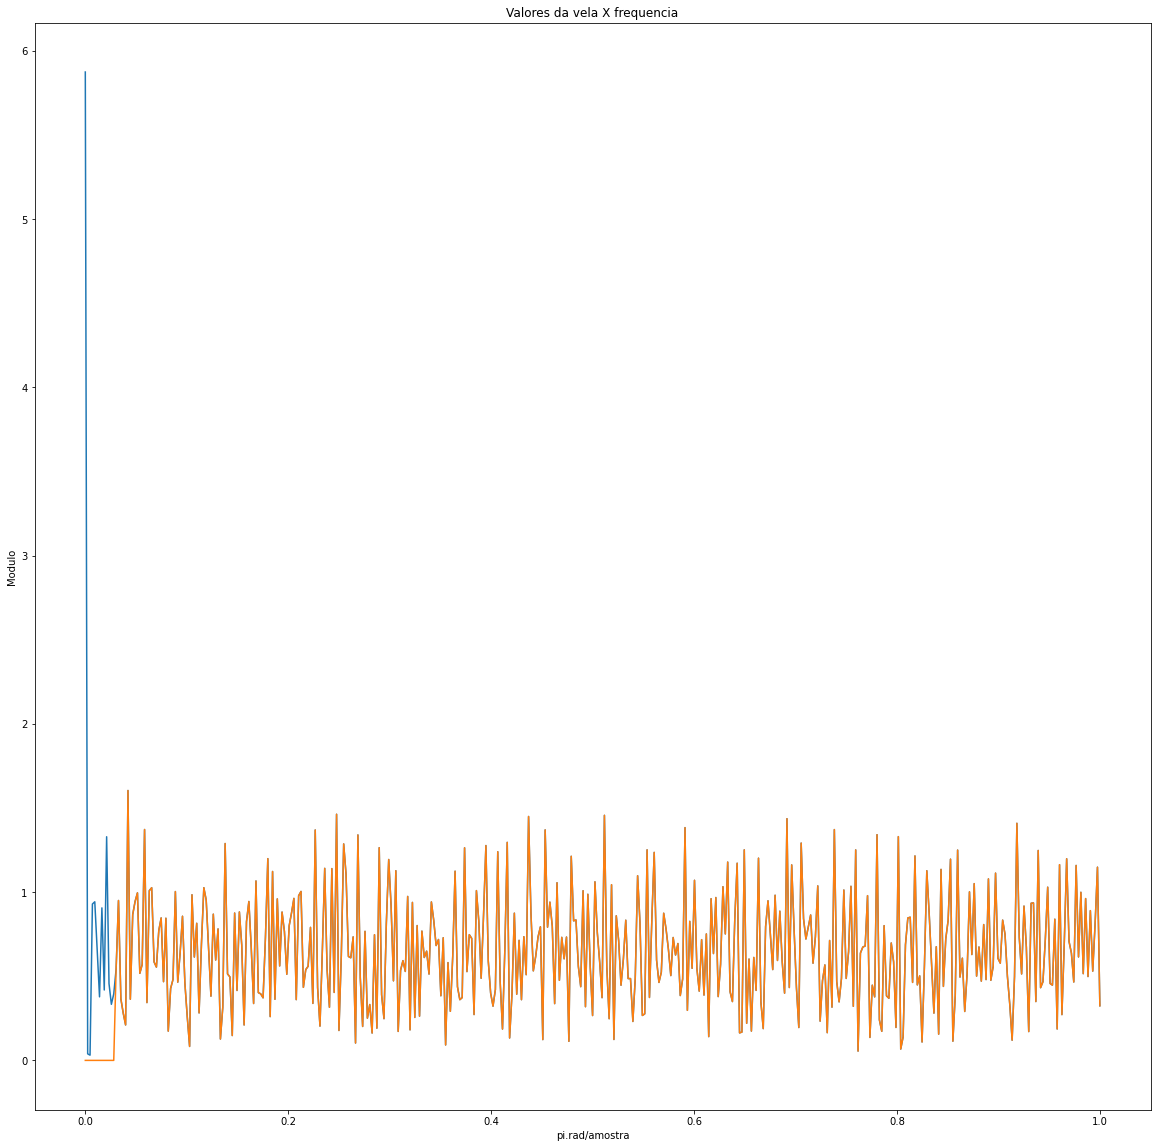

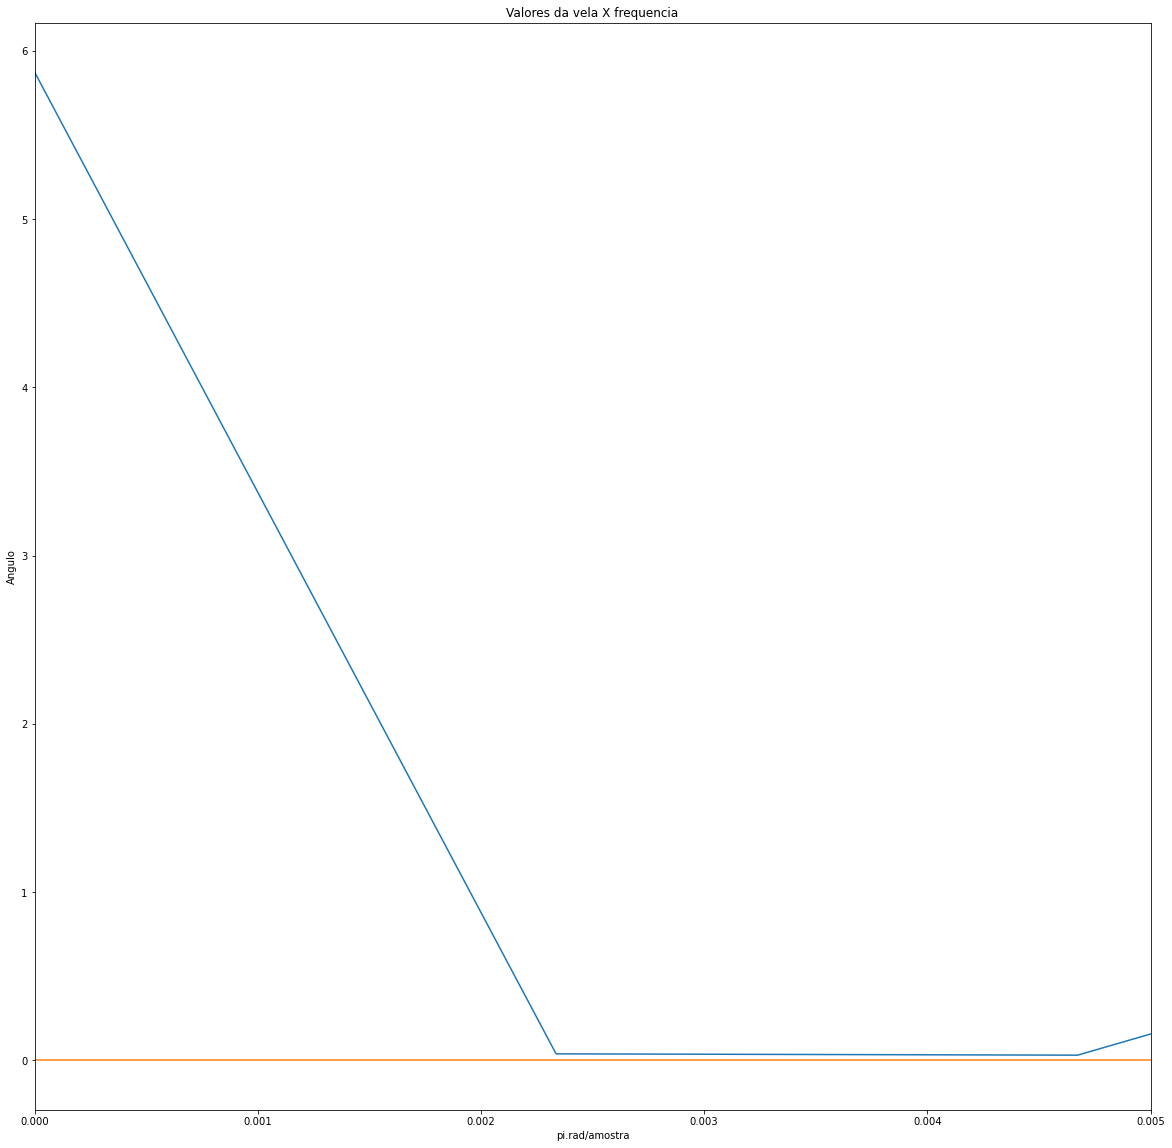

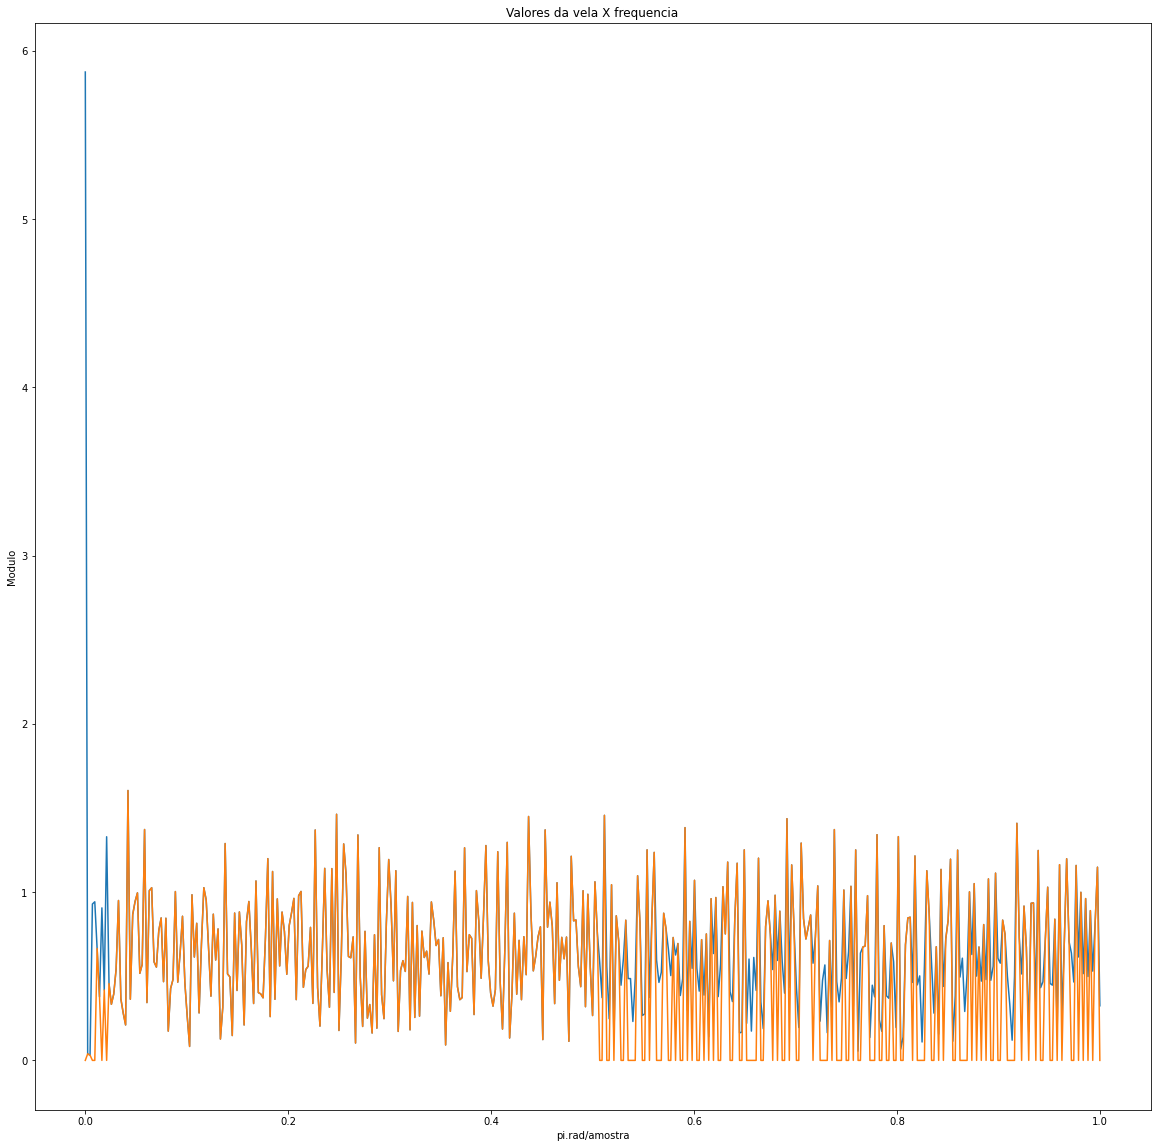

In [6]:
from scipy.fft import fft, ifft
valorVelaF=fft(valorVela)[:len(valorVela)//2]/len(valorVela)
f=np.linspace(0,1,len(valorVelaF[:len(valorVela)//2]))
plt.figure(figsize=(20, 20))
plt.title("Valores da vela X frequencia")
plt.xlabel("pi.rad/amostra")
plt.ylabel("Modulo")
plt.plot(f,np.abs(valorVelaF))
plt.show()
plt.figure(figsize=(20, 20))
plt.title("Valores da vela X frequencia")
plt.xlabel("pi.rad/amostra")
plt.ylabel("Angulo")
plt.plot(f,np.abs(valorVelaF))
plt.xlim([0,0.0050])
plt.show()
#Decomposição das senoides

t=np.linspace(0,1*60,600)

relatorio=[]

senoideReal=0*t
senoideImag=0*t
sinalCompleto=0*t

plt.figure(figsize=(20, 20))
plt.title("Valores da vela na frequencia ")
plt.xlabel("t")
plt.ylabel("Valor da velar")
plt.xlim([0,10])

for k in range(len(valorVelaF)):
    real=np.real(valorVelaF[k])
    imag=np.imag(valorVelaF[k])
    senoideReal=senoideReal+real*np.sin(k*np.pi*2*t)
    senoideImag=senoideImag+np.sin(k*np.pi*t)
    sinalCompleto=senoideReal+1j*senoideImag+sinalCompleto
    plt.plot(t,real*np.sin(k*np.pi*2*t))
#     print(str(real)+"seno("+str(k)+"*pi*2*t) +j"+str(imag)+"cos("+str(k)+"*pi*2*t)+",end='')
    if(k>0):
        relatorio.append("Nivel de variacao no perido de "+str(1/f[k])+"segundos: "+str((100*np.abs(valorVelaF[k]/1)/100)))
plt.show()


Filtro1=0.03
Filtro2=0.5

senoideReal=0*t
senoideImag=0*t
sinalCompleto=0*t
plt.figure(figsize=(20, 20))
plt.title("Valores da vela na frequencia ")
plt.xlabel("t")
plt.ylabel("Valor da velar")
plt.xlim([0,10])


for k in range(30):
    real=np.real(valorVelaF[k])
    imag=np.imag(valorVelaF[k])
    senoideReal=senoideReal+real*np.sin(k*np.pi*2*t)
    senoideImag=senoideImag+np.sin(k*np.pi*t)
    sinalCompleto=senoideReal+1j*senoideImag+sinalCompleto
    plt.plot(t,real*np.sin(k*np.pi*2*t))
#     print(str(real)+"seno("+str(k)+"*pi*2*t) +j"+str(imag)+"cos("+str(k)+"*pi*2*t)+",end='')
    if(k>0):
        relatorio.append("Nivel de variacao no perido de "+str(1/f[k])+"segundos: "+str((100*np.abs(valorVelaF[k]/1)/100)))
plt.show()


valorVelaFFiltrado=valorVelaF*(f>=Filtro1)

plt.figure(figsize=(20, 20))
plt.title("Valores da vela X frequencia")
plt.xlabel("pi.rad/amostra")
plt.ylabel("Modulo")
plt.plot(f,np.abs(valorVelaF))
plt.plot(f,np.abs(valorVelaFFiltrado))
plt.show()
plt.figure(figsize=(20, 20))
plt.title("Valores da vela X frequencia")
plt.xlabel("pi.rad/amostra")
plt.ylabel("Angulo")
plt.plot(f,np.abs(valorVelaF))
plt.plot(f,np.abs(valorVelaFFiltrado))
plt.xlim([0,0.0050])
plt.show()


valorVelaFFiltrado=valorVelaF*(f>=Filtro1)*(np.abs(valorVelaF)>np.mean(np.abs(valorVelaF)))+valorVelaF*(f<=Filtro2)*(np.abs(valorVelaF)<np.mean(np.abs(valorVelaF)))
plt.figure(figsize=(20, 20))
plt.title("Valores da vela X frequencia")
plt.xlabel("pi.rad/amostra")
plt.ylabel("Modulo")
plt.plot(f,np.abs(valorVelaF))
plt.plot(f,np.abs(valorVelaFFiltrado))
plt.show()



In [ ]:
for k in range(len(valorVelaF)):
    senoideReal=senoideReal+real*np.sin(k*np.pi*2*t)
    senoideImag=senoideImag+np.sin(k*np.pi*t)
    print(str(real)+"seno("+str(k)+"*pi*2*t) +j"+str(imag)+"cos("+str(k)+"*pi*2*t)+",end='')

plt.show()

for k in relatorio:
    print(k)